In [9]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

arquivo = 'output/data.csv'
usecols = ["indice", "metodo", "tipo", "tamanho", "tempo1", "tempo2", "tempo3", "tempo4", "tempo5", "tempo6", "tempo7", "tempo8", "tempo9", "tempo10"]
df = pd.read_csv(arquivo, index_col = "indice", usecols = usecols)

df

,metodo,tipo,tamanho,tempo1,tempo2,tempo3,tempo4,tempo5,tempo6,tempo7,tempo8,tempo9,tempo10
indice,,,,,,,,,,,,,
0,quickM,1,1000000,0.176,0.187,0.181,0.171,0.170,0.198,0.192,0.186,0.183,0.179
1,quickM,1,2000000,0.376,0.383,0.371,0.389,0.393,0.369,0.379,0.376,0.393,0.392
2,quickM,1,3000000,0.634,0.636,0.635,0.616,0.628,0.638,0.632,0.646,1.069,0.755
3,quickM,1,5000000,1.373,1.386,1.244,1.261,1.260,1.260,1.244,1.279,1.278,1.257
4,quickM,1,10000000,3.576,3.487,3.525,3.600,3.589,3.500,3.514,3.547,4.504,3.927
5,quickM,2,1000000,0.134,0.144,0.130,0.138,0.122,0.140,0.124,0.126,0.127,0.125
6,quickM,2,2000000,0.257,0.262,0.281,0.271,0.259,0.272,0.275,0.254,0.257,0.276
7,quickM,2,3000000,0.397,0.420,0.399,0.417,0.381,0.379,0.362,0.369,0.369,0.410
8,quickM,2,5000000,0.716,0.664,0.659,0.668,0.650,0.701,0.656,0.667,0.706,0.722


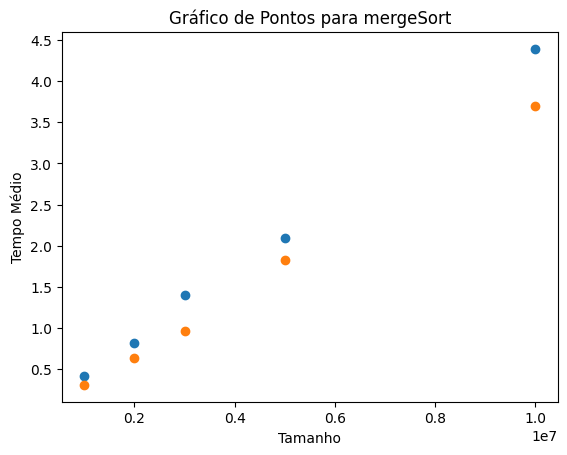

In [10]:
# Filtrando os dados para o método "mergeSort"
df_shell_sort1 = df[(df['metodo'] == 'mergeSort') & (df['tipo'] == 1)]
df_shell_sort2 = df[(df['metodo'] == 'mergeSort') & (df['tipo'] == 2)]

# Selecionando as colunas relevantes para o gráfico de pontos
coluna_tempo_medio1 = df_shell_sort1[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)
coluna_tempo_medio2 = df_shell_sort2[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)

# Plotando o gráfico de pontos
plt.scatter(df_shell_sort1["tamanho"], coluna_tempo_medio1)
plt.scatter(df_shell_sort2["tamanho"], coluna_tempo_medio2)

# Adicionando rótulos aos eixos
plt.xlabel('Tamanho')
plt.ylabel('Tempo Médio')
plt.title('Gráfico de Pontos para mergeSort')

# Exibindo o gráfico
plt.show()

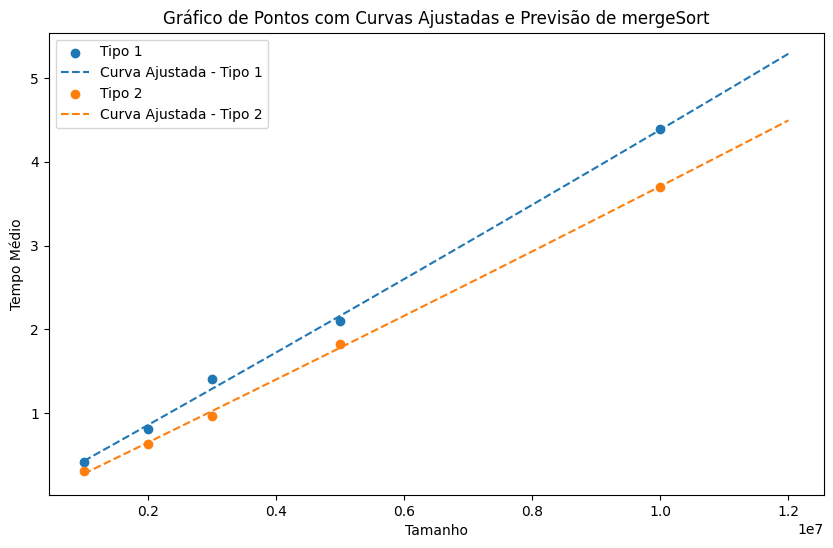

In [11]:
metodo = 'mergeSort'

# Seu código para filtrar e calcular a média
df_shell_sort1 = df[(df['metodo'] == metodo) & (df['tipo'] == 1)]
df_shell_sort2 = df[(df['metodo'] == metodo) & (df['tipo'] == 2)]

coluna_tempo_medio1 = df_shell_sort1[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)
coluna_tempo_medio2 = df_shell_sort2[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)

# Função para ajustar uma curva
def funcao_ajuste(x, a, b, c):
    return a * x**2 + b * x + c

# Função para criar e exibir o gráfico com previsão
def criar_e_exibir_grafico_com_previsao(x, *conjuntos_de_dados, previsao_horizonte=50):
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura

    # Plota os pontos para cada conjunto de dados
    for i, y in enumerate(conjuntos_de_dados):
        plt.scatter(x, y, label=f'Tipo {i + 1}')

        # Ajusta a curva aos dados
        parametros, _ = curve_fit(funcao_ajuste, x, y)

        # Gera valores preditos usando a curva ajustada
        x_predito = np.linspace(min(x), max(x) + previsao_horizonte, 100)
        y_predito = funcao_ajuste(x_predito, *parametros)

        # Plota a curva ajustada e a previsão
        plt.plot(x_predito, y_predito, label=f'Curva Ajustada - Tipo {i + 1}', linestyle='--')

    # Adiciona rótulos e título
    plt.xlabel('Tamanho')
    plt.ylabel('Tempo Médio')
    plt.title('Gráfico de Pontos com Curvas Ajustadas e Previsão de %s' % metodo)

    # Adiciona uma legenda
    plt.legend()

    # Exibe o gráfico
    plt.show()

# Exemplo de uso com previsão
criar_e_exibir_grafico_com_previsao(
    df_shell_sort1["tamanho"],
    coluna_tempo_medio1,
    coluna_tempo_medio2,
    previsao_horizonte=2000000
)


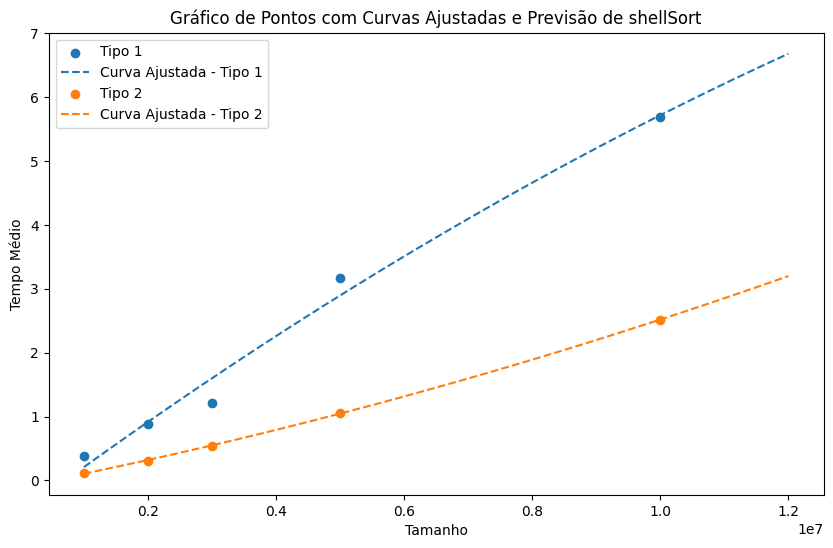

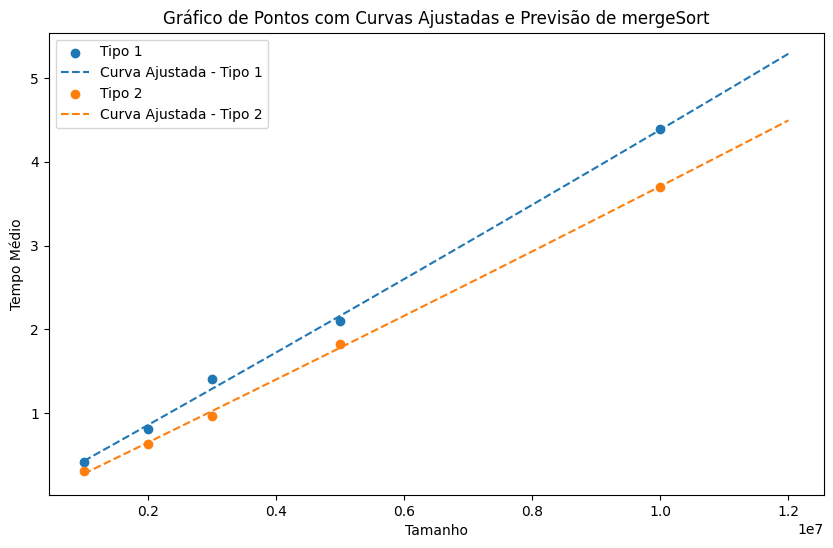

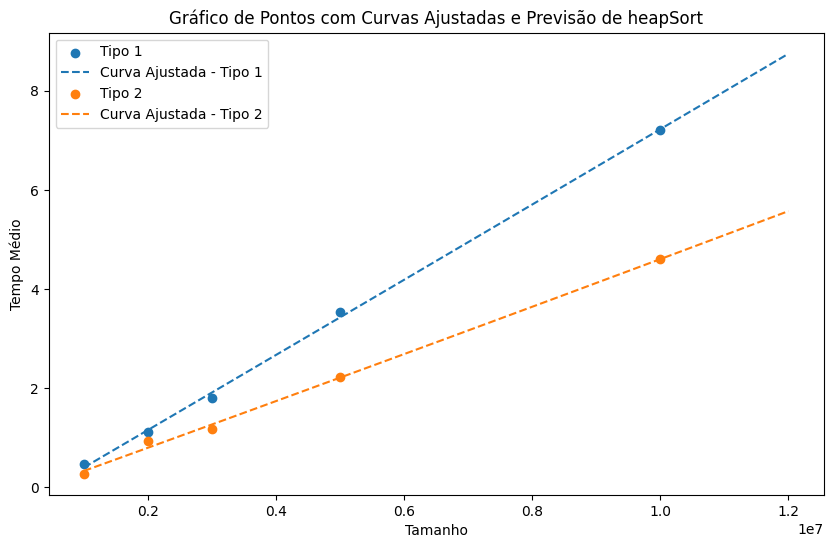

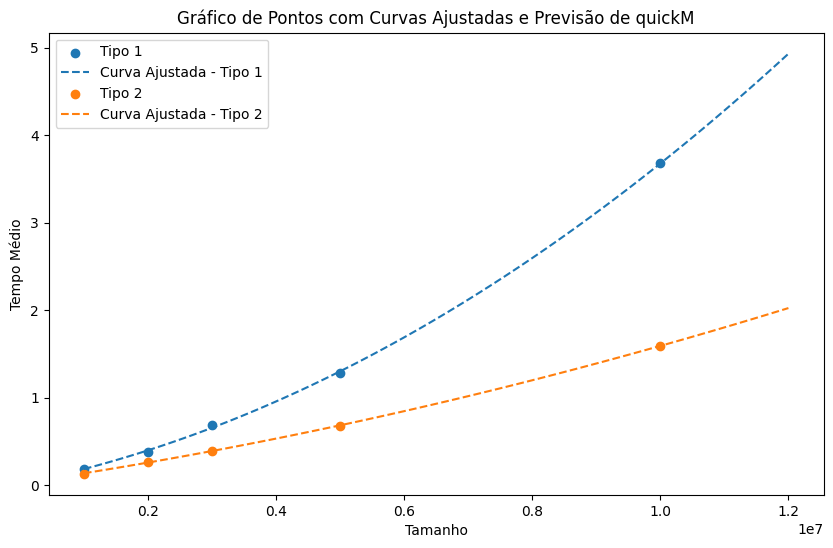

In [12]:
metodo = ['shellSort','mergeSort','heapSort','quickM']
lenmet = len(metodo)

for ima in range(lenmet):
    # Seu código para filtrar e calcular a média
    df_shell_sort1 = df[(df['metodo'] == metodo[ima]) & (df['tipo'] == 1)]
    df_shell_sort2 = df[(df['metodo'] == metodo[ima]) & (df['tipo'] == 2)]

    coluna_tempo_medio1 = df_shell_sort1[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)
    coluna_tempo_medio2 = df_shell_sort2[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)

    # Função para ajustar uma curva
    def funcao_ajuste(x, a, b, c):
        return a * x**2 + b * x + c

    # Função para criar e exibir o gráfico com previsão
    def criar_e_exibir_grafico_com_previsao(x, *conjuntos_de_dados, previsao_horizonte=50):
        plt.figure(figsize=(10, 6))  # Define o tamanho da figura

        # Plota os pontos para cada conjunto de dados
        for i, y in enumerate(conjuntos_de_dados):
            plt.scatter(x, y, label=f'Tipo {i + 1}')

            # Ajusta a curva aos dados
            parametros, _ = curve_fit(funcao_ajuste, x, y)

            # Gera valores preditos usando a curva ajustada
            x_predito = np.linspace(min(x), max(x) + previsao_horizonte, 100)
            y_predito = funcao_ajuste(x_predito, *parametros)

            # Plota a curva ajustada e a previsão
            plt.plot(x_predito, y_predito, label=f'Curva Ajustada - Tipo {i + 1}', linestyle='--')

        # Adiciona rótulos e título
        plt.xlabel('Tamanho')
        plt.ylabel('Tempo Médio')
        plt.title('Gráfico de Pontos com Curvas Ajustadas e Previsão de %s' % metodo[ima])

        # Adiciona uma legenda
        plt.legend()

        # Exibe o gráfico
        plt.show()

    # Exemplo de uso com previsão
    criar_e_exibir_grafico_com_previsao(
        df_shell_sort1["tamanho"],
        coluna_tempo_medio1,
        coluna_tempo_medio2,
        previsao_horizonte=2000000
    )
